In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1)Load the data

In [3]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.info() # almost all the columns are of object type exxcept one column is int
# also all column count for not-null values is not same..so check for nulll values with isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.isnull().sum()# can see that there are 4 columns containing null/nan values

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

The columns director and cast is not soo important for this dataset, and also they have many null values, hence droping them

In [7]:
df.drop(['director'], inplace = True, axis =1)
df.drop(['cast'], inplace=True, axis = 1)

In [8]:
df.isnull().sum()

show_id           0
type              0
title             0
country         831
date_added       10
release_year      0
rating            4
duration          3
listed_in         0
description       0
dtype: int64

now country and date_added columns also has null values but they can be ignored as not to change original dataset order

2)Explore data

In [12]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [15]:
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

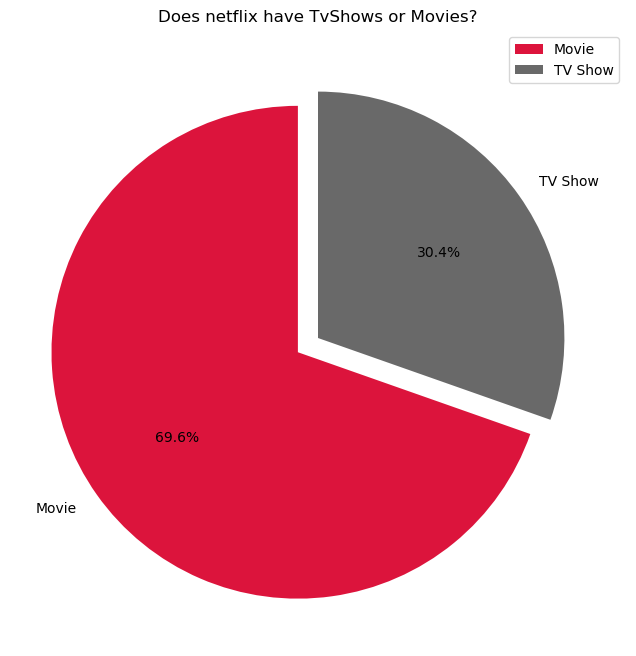

In [20]:
percent = df['type'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(percent.values, labels = percent.index, autopct = '%.1f%%', startangle = 90, explode = [0.1,0], colors = ['crimson', 'dimgrey'])
plt.legend()
plt.title("Does netflix have TvShows or Movies?")
plt.show()

In [21]:
type_and_date = df[['type', 'date_added']].copy()
type_and_date['date_added'] = pd.to_datetime(type_and_date['date_added'], format = 'mixed')
type_and_date['year_added'] = pd.DatetimeIndex(type_and_date['date_added']).year
type_and_date

,type,date_added,year_added
0,Movie,2021-09-25,2021.0
1,TV Show,2021-09-24,2021.0
2,TV Show,2021-09-24,2021.0
3,TV Show,2021-09-24,2021.0
4,TV Show,2021-09-24,2021.0
...,...,...,...
8802,Movie,2019-11-20,2019.0
8803,TV Show,2019-07-01,2019.0
8804,Movie,2019-11-01,2019.0
8805,Movie,2020-01-11,2020.0


In [24]:
type_and_date.isnull().sum()# as there are 10 null values and we are focusing mainly on to find weather tv shows or movies uploaded more by year
# hence droping them

type           0
date_added    10
year_added    10
dtype: int64

In [25]:
type_and_date.dropna(inplace=True)
type_and_date['year_added'].unique()

array([2021., 2020., 2019., 2018., 2017., 2016., 2015., 2014., 2013.,
       2012., 2011., 2009., 2008., 2010.])

In [26]:
count = type_and_date.groupby(['year_added', 'type']).count().rename(columns={'date_added':'count'})
count.reset_index(inplace=True)
count

,year_added,type,count
0,2008.0,Movie,1
1,2008.0,TV Show,1
2,2009.0,Movie,2
3,2010.0,Movie,1
4,2011.0,Movie,13
5,2012.0,Movie,3
6,2013.0,Movie,6
7,2013.0,TV Show,5
8,2014.0,Movie,19
9,2014.0,TV Show,5


In [27]:
count_tvshow = count[count['type']=='TV Show']
count_movies = count[count['type']=='Movie']

In [28]:
count_tvshow

,year_added,type,count
1,2008.0,TV Show,1
7,2013.0,TV Show,5
9,2014.0,TV Show,5
11,2015.0,TV Show,26
13,2016.0,TV Show,176
15,2017.0,TV Show,349
17,2018.0,TV Show,412
19,2019.0,TV Show,592
21,2020.0,TV Show,595
23,2021.0,TV Show,505


In [29]:
count_movies

,year_added,type,count
0,2008.0,Movie,1
2,2009.0,Movie,2
3,2010.0,Movie,1
4,2011.0,Movie,13
5,2012.0,Movie,3
6,2013.0,Movie,6
8,2014.0,Movie,19
10,2015.0,Movie,56
12,2016.0,Movie,253
14,2017.0,Movie,839


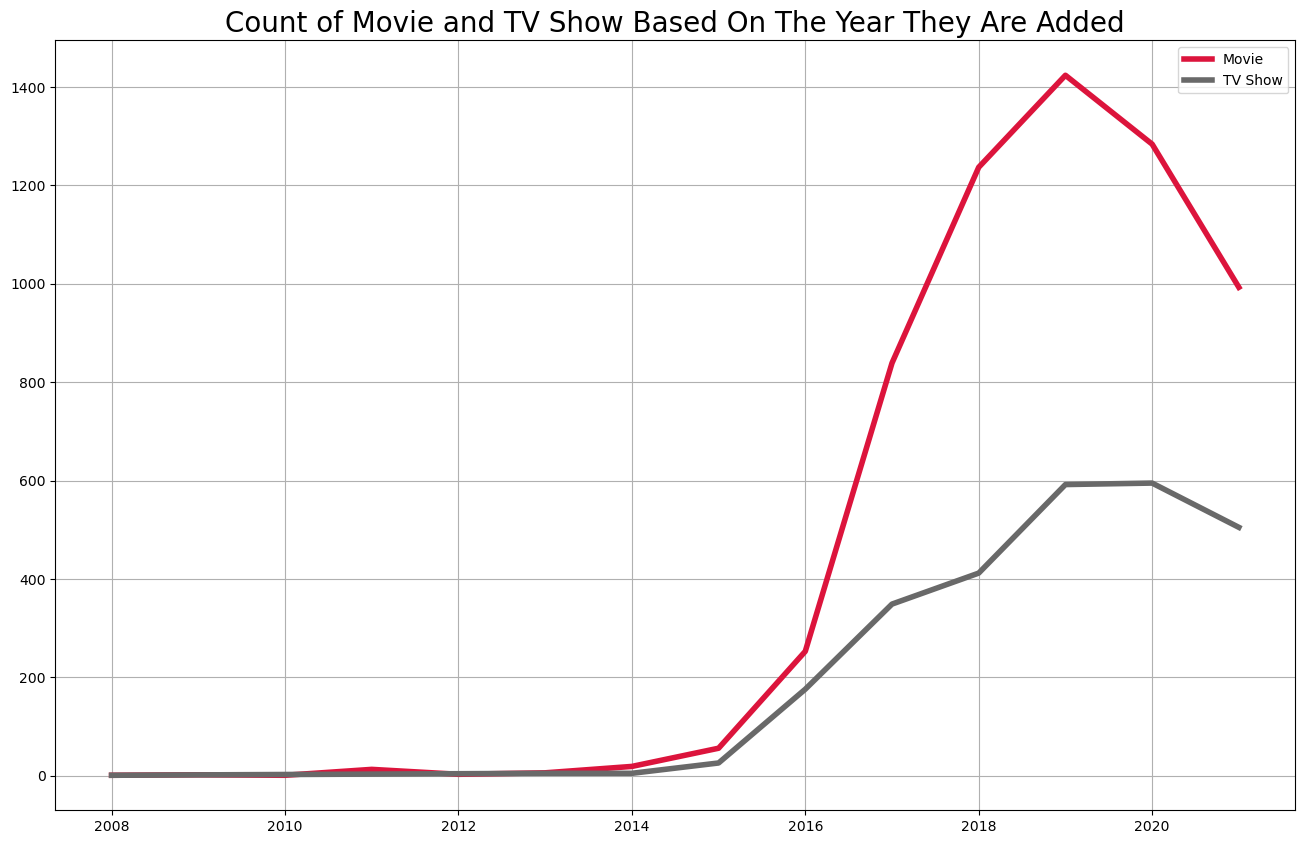

In [30]:
plt.figure(figsize=(16,10))
plt.plot(count_movies['year_added'], count_movies['count'], lw=4, c='crimson', label='Movie')
plt.plot(count_tvshow['year_added'], count_tvshow['count'], lw=4, c='dimgrey', label='TV Show')
plt.legend()
plt.grid()
plt.title('Count of Movie and TV Show Based On The Year They Are Added', fontsize=20)
plt.show()

In [31]:
cumulative_count_tvshow = count_tvshow.groupby('type').cumsum()
cumulative_count_tvshow

,year_added,count
1,2008.0,1
7,4021.0,6
9,6035.0,11
11,8050.0,37
13,10066.0,213
15,12083.0,562
17,14101.0,974
19,16120.0,1566
21,18140.0,2161
23,20161.0,2666


In [32]:
cumulative_count_movies = count_movies.groupby('type').cumsum()
cumulative_count_movies

,year_added,count
0,2008.0,1
2,4017.0,3
3,6027.0,4
4,8038.0,17
5,10050.0,20
6,12063.0,26
8,14077.0,45
10,16092.0,101
12,18108.0,354
14,20125.0,1193


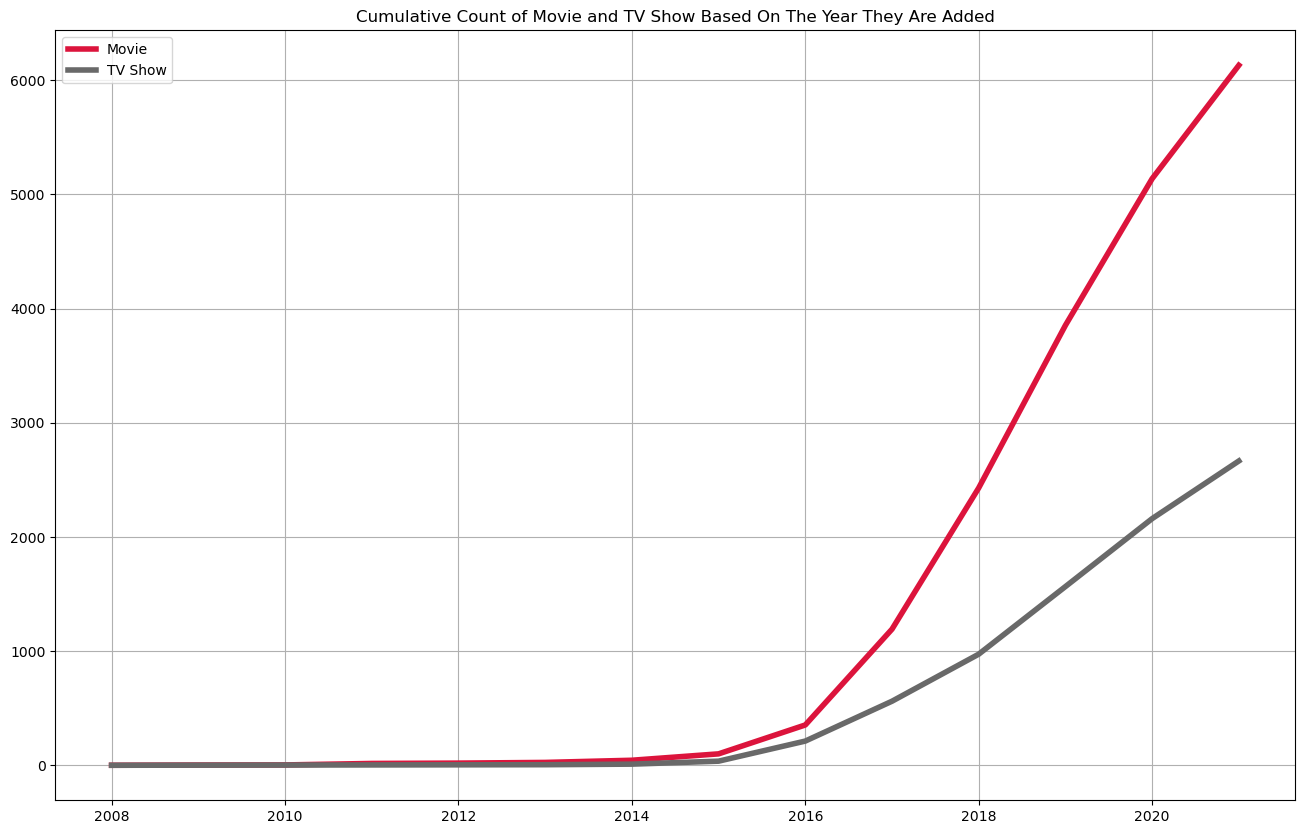

In [33]:
plt.figure(figsize=(16,10))
plt.plot(count_movies['year_added'], cumulative_count_movies['count'], lw=4, c='crimson', label='Movie')
plt.plot(count_tvshow['year_added'], cumulative_count_tvshow['count'], lw=4, c='dimgrey', label='TV Show')
plt.legend()
plt.grid()
plt.title('Cumulative Count of Movie and TV Show Based On The Year They Are Added')
plt.show()

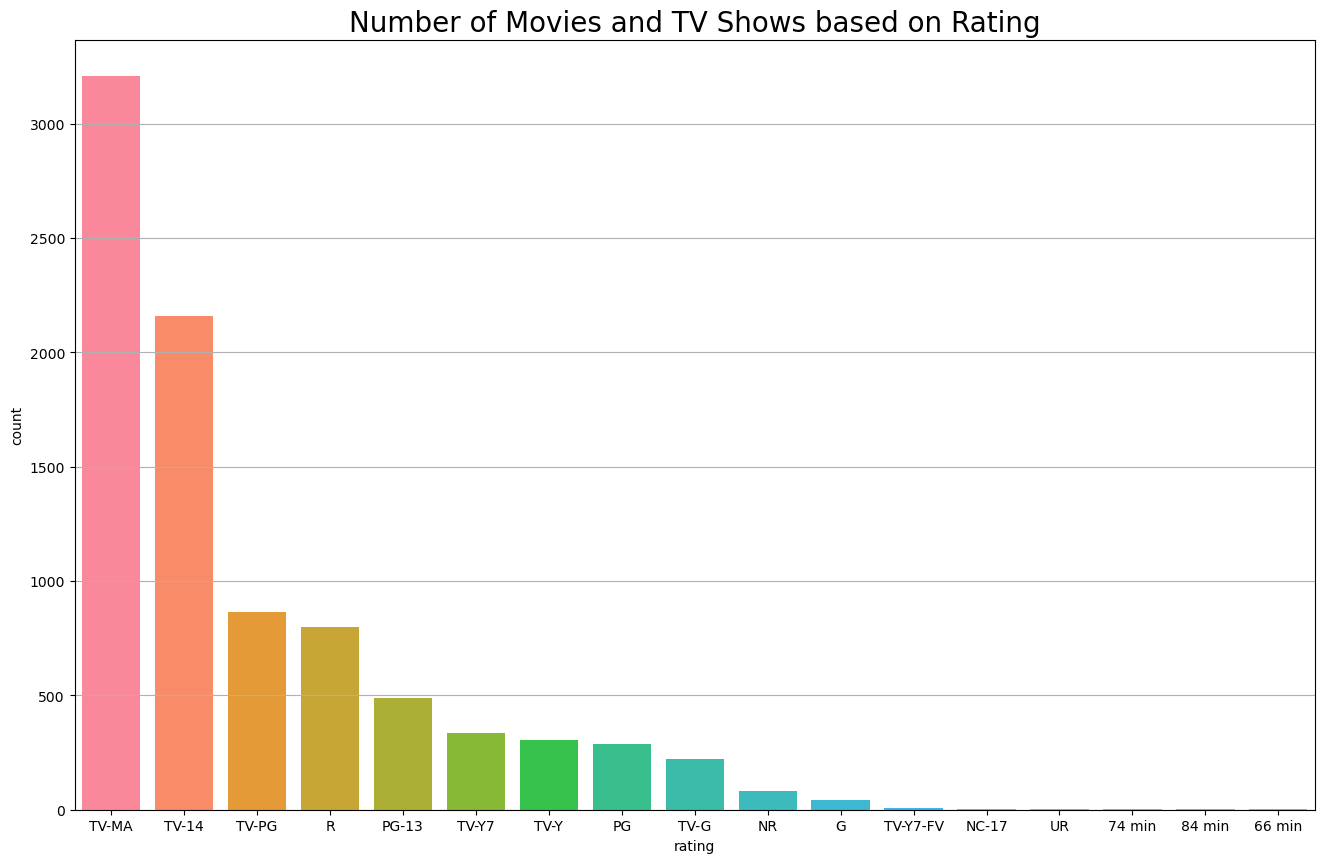

In [36]:
# rating_count
plt.figure(figsize=(16,10))
plt.title('Number of Movies and TV Shows based on Rating', fontsize=20)
plt.grid()
sns.countplot(x='rating', data=df, saturation=1, order=df['rating'].value_counts().index);

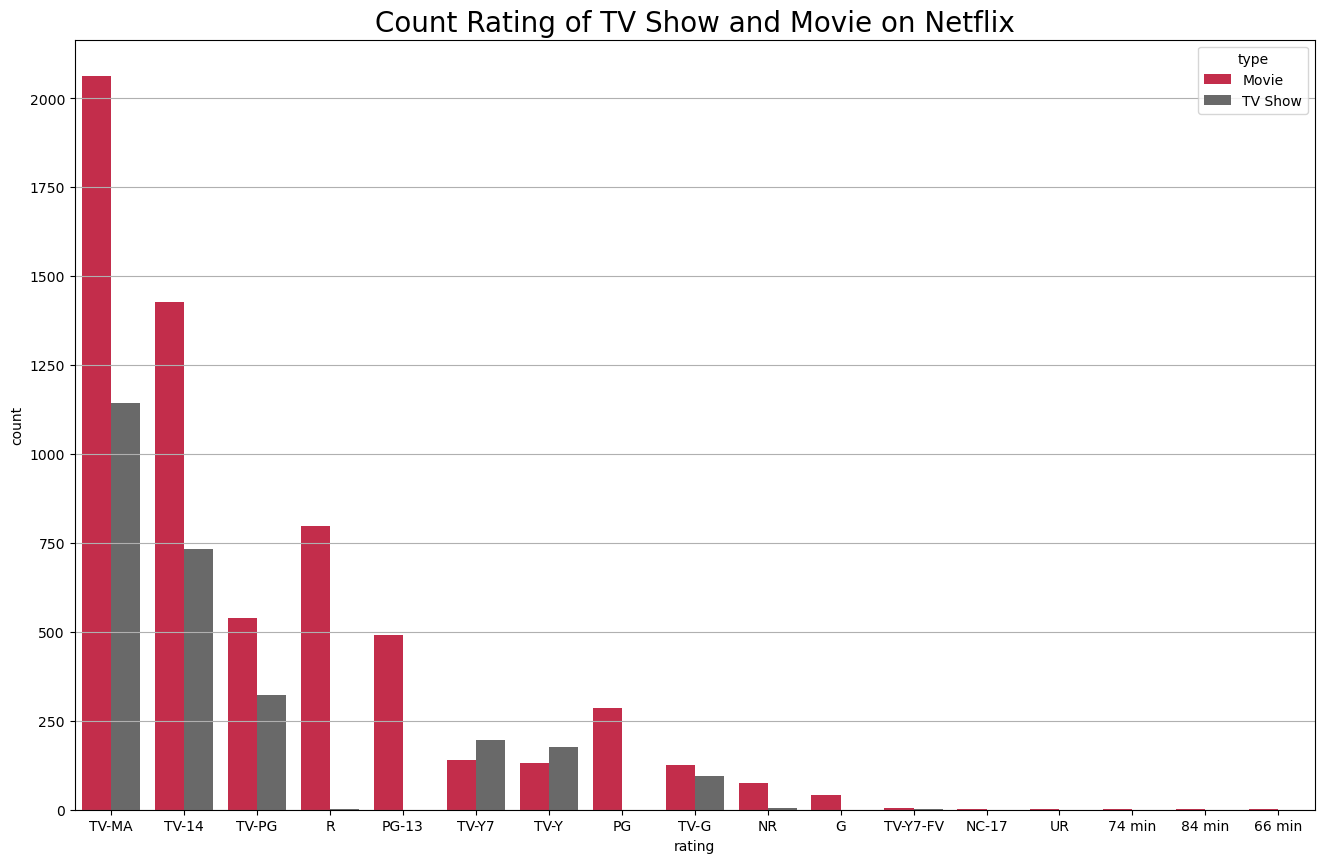

In [37]:
plt.figure(figsize=(16,10))
plt.title('Count Rating of TV Show and Movie on Netflix', fontsize=20)
plt.grid()
sns.countplot(x='rating', hue='type', data=df, order=df['rating'].value_counts().index, palette=['crimson', 'dimgrey']);

In [38]:
#Top 5 oldest movies available on netflix based on release year
df.sort_values('release_year', ascending=True)[['title','date_added','release_year']].head() 

,title,date_added,release_year
4250,Pioneers: First Women Filmmakers*,"December 30, 2018",1925
7790,Prelude to War,"March 31, 2017",1942
8205,The Battle of Midway,"March 31, 2017",1942
8660,Undercover: How to Operate Behind Enemy Lines,"March 31, 2017",1943
8739,Why We Fight: The Battle of Russia,"March 31, 2017",1943


In [39]:
# top 5 newest movies available on Netflix based pn release year
df.sort_values('release_year', ascending = False)[['title', 'date_added','release_year']].head()

,title,date_added,release_year
693,Ali & Ratu Ratu Queens,"June 17, 2021",2021
781,Black Holes | The Edge of All We Know,"June 2, 2021",2021
762,Sweet & Sour,"June 4, 2021",2021
763,Sweet Tooth,"June 4, 2021",2021
764,Trippin' with the Kandasamys,"June 4, 2021",2021


In [40]:
# top 5 oldest movies available on netflix based on year_added
df['year_added'] = pd.DatetimeIndex(df['date_added']).year

In [41]:
df.sort_values('year_added', ascending=True)[['title','date_added','release_year']].head()

,title,date_added,release_year
5957,To and From New York,"January 1, 2008",2006
6611,Dinner for Five,"February 4, 2008",2007
5956,Just Another Love Story,"May 5, 2009",2007
5955,Splatter,"November 18, 2009",2009
7370,Mad Ron's Prevues from Hell,"November 1, 2010",1987
